<a href="https://colab.research.google.com/github/lourencocavalcante/CAP-419-Programacao-com-Dados-Geoespaciais/blob/main/Atividade01_Lourenco_CAP419_ProgGeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# <span style="color:#336699">ACESSO E VISUALIZAÇÃO DE IMAGENS DE SENSORIAMENTO REMOTO: Visualização das Imagens com o Serviço TMS</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 110%;">
    <b>CAP-419 – Introdução à Programação com Dados Geoespaciais (ProgGeo)</b>
    <br/>
    <b>Docentes:</b> Prof. Dr. Gilberto Ribeiro Queiroz e Prof. Dr. Thales Sehn Körting
    <br/><br/>
    <b>Discente:</b> Lourenço José Cavalcante Neto
    <br/>
    <b>E-mail:</b> <a href="mailto:lourenco.cavalcante@ifto.edu.b">lourenco.cavalcante@ifto.edu.br</a>

</div>

<br/>

<div style="text-align: justify;  margin-left: 20%; margin-right: 20%;">
<b>Objetivo: </b> O principal objetivo deste caderno notebook é aplicar técnicas de sensoriamento remoto utilizando o NDVI (Índice de Vegetação por Diferença Normalizada) como ferramenta de análise. Para isso, conforme solicitado pelos professores, foi executado o script base até o final e incluído etapas adicionais: calculo o NDVI de duas imagens fornecidas, obtenho a média dos valores de NDVI de cada uma, visualizo ambas as imagens para comparação e, por fim, percorro todos os pixels de cada imagem para contar quantos apresentam valores acima e abaixo de um limiar definido (por exemplo, 0.5).
</div>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Acesso e Visualização de Imagens de Sensoriamento Remoto</span>
<hr style="border:2px solid #0077b9;">





<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
    <b>Resumo.</b> Na <em>Plataforma Brazil Data Cube</em> as coleções de imagens e cubos de dados podem ser consultadas e visualizadas através de uma interface gráfica com o usuário denominada <a href="https://brazildatacube.dpi.inpe.br/portal/explore" target="_blank">Data Cube Explorer</a>, ou através de interfaces de programação de aplicações (API) baseadas em diversos serviços web, como o <a href="https://stacspec.org/" target="_blank">SpatioTemporal Asset Catalog (STAC)</a>, <a href="https://wiki.osgeo.org/wiki/Tile_Map_Service_Specification" target="_blank">Tile Map Service (TMS)</a>, e <a href="http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004" target="_blank">Web Time Series Service (WTSS)</a>, entre outros. Este Jupyter Notebook apresenta uma visão geral do uso desses serviços para descoberta, acesso e visualização aos produtos de dados de sensoriamento remoto com base nas tecnologias da <em>Plataforma Brazil Data Cube</em>.
</div>

<br/>


<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# Catálogo de Coleções de Imagem de Sensoriamento Remoto
<hr style="border:1px solid #0077b9;">

Os produtos de imagem da Plataforma Brazil Data Cube são disponibilizados na forma de arquivos otimizados para *cloud*, os denominados **C**loud **O**ptimized **G**eoTIFF (**COG**). Este formato permite que as aplicações possam utilizar as imagens através da Web com o melhor compromisso possível (pirâmide de multi-resolução e *tiles*).


Esses produtos de dados podem ser consultados utilizando uma interface de programação de aplicações baseada no padrão aberto [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/). Esta especificação, criada por diversas organizações e especialistas do setor geoespacial, é baseada nos conceitos apresentados no diagrama abaixo:

<center>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-concept.png" width="480" />
<br/>
<b>Figure 1</b> - STAC model.
</center>

Onde:

- **Catalog**: É um tipo de objeto que fornece uma estrutura para vincular vários itens ou coleções STAC juntos ou mesmo outros catálogos. Na figura acima, o catálogo é composto de três coleções: Landsat/OLI, CBERS4/WFI e Sentinel-2/MSI.

- **Collection:** É uma especialização do catálogo que permite incluir informações adicionais sobre uma determinada coleção espaço-temporal. Uma coleção pode conter informações como o conjunto de bandas espectrais disponíveis das imagens, a extensão geográfica ou área de cobertura das imagens, o período de tempo que compreende a coleção, entre outras informações. Em geral, através da coleção chegamos aos itens dessa coleção.

- **Item**: Corresponde à unidade atômica de metadados, fornecendo links para os *assets* associados. Um `Item` é descrito através da notação GeoJSON, como uma feição (*feature*) contendo atributos específicos como a coleção a que ele pertence, propriedades temporais, links para os *assets* e coleções ou catálogos associados. Na figura acima, um `Item` equivale a uma cena do satélite de um determinado instante de tempo.

- **Asset**: Um *asset* é qualquer recurso geoespacial, como um arquivo de imagem ou arquivo vetorial, contendo informações sobre a Terra, em um determinado espaço e tempo.


A especificação conceitual do STAC permite dois tipos de implementações:

- **STAC estático:** Baseada em um conjunto de documentos JSON ligados que podem ser facilmente navegados. Ex: [CBERS na AWS](https://cbers-stac-1-0-0.s3.amazonaws.com/CBERS4/catalog.json).

- **STAC dinâmico:** Baseada em uma API RESTful, de modo que a navegação é realizada através de uma API de serviço web que permite realizar consultas utilizando uma linguagem padrão para acessar subconjuntos do catálogo. Ex: [BDC-STAC](https://data.inpe.br/bdc/stac/v1/).

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# Base de Informações Georreferenciadas (BIG)
<hr style="border:1px solid #0077b9;">


Como parte do aperfeiçoamento dos produtos e serviços disponibilizados pelo INPE à sociedade, o novo portal https://data.inpe.br/ faz parte da modernização da infraestrutura de serviços para acesso às imagens de satélites do acervo do instituto. Esse portal foi criado com o intuito de facilitar a pesquisa e obtenção das imagens disponibilizadas gratuitamente. Esse novo serviço tem como base protocolos modernos de compartilhamento de dados, adequados ao uso em ambientes de ciência de dados e computação em nuvem. Essa iniciativa é ancorada dentro do **Programa Base de Informações Georreferenciadas (BIG)** do INPE.


Os produtos de dados e tecnologias do **Brazil Data Cube (BDC)**, originalmente disponíveis no endereço https://brazildatacube.dpi.inpe.br, estão sendo migrados para o novo endereço https://data.inpe.br, na infraestrutura do centro de dados do INPE. Dessa forma, é importante saber que os endereços dos serguintes recursos:

- **Novo endereço do catálogo STAC:** https://data.inpe.br/bdc/stac/v1. Nesse novo endereço você encontrará não somente as coleções e cubos CBERS, Landsat e Sentinel-2 disponibilizados originalmente pelo BDC, mas também produtos disponibilizados por outra áreas e projetos do INPE, como dados GOES, CBERS4A WPM, Sentinel-1 GRD, Sentinel-3/OLCI - Level-1B Full Resolution.
  
  
- **Antigo endereço do catáogo STAC:** https://brazildatacube.dpi.inpe.br/stac/. Nesse endereço ainda é possível acessar parcialmente cubos e coleções CBERS, Landsat e Sentinel-2.

# Cliente STAC no Python
<hr style="border:1px solid #0077b9;">

Para demonstrar o acesso aos produtos de dados do Brazil Data Cube, iremos utilizar uma bibloteca de software livre para Python denominada [PySTAC Client](https://pystac-client.readthedocs.io/en/stable/) (`pystac-client`). Uma vez instalada essa biblioteca, podemos carregar suas funcionalidades através do comando `import`, como mostrado abaixo:

In [51]:
!pip install pystac_client

In [52]:
import pystac_client

Em geral, diversas bibliotecas do ecossistema Python possui uma constante especial para informar a versão da biblioteca carregada. Abaixo, apresentamos a versão carregada  da biblioteca `pystac-client`:

In [53]:
pystac_client.__version__

'0.8.6'

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-catalog.png?raw=true" align="right" width="300"/>

# Descobrindo as Coleções de Imagem de Sensoriamento Remoto
<hr style="border:1px solid #0077b9;">

O código abaixo cria uma instância do catálogo a partir de uma consulta ao serviço web do Brazil Data Cube:

In [54]:
catalogo = pystac_client.Client.open("https://data.inpe.br/bdc/stac/v1/")
catalogo

<Client id=INPE>

Para listar as coleções contidas no catálogo, podemos fazer:

In [55]:
for colecao in catalogo.get_collections():
    print(f"{colecao.id}: {colecao.title}", end="\n"*2)

mosaic-cbers4a-paraiba-3m-1: CBERS-4A/WFI Image Mosaic of Brazil Paraíba State - 3 Months

LCC_L8_30_16D_STK_Cerrado-1: LCC - Cerrado - LC8 30m 16D STK

mosaic-landsat-sp-6m-1: Landsat Image Mosaic of São Paulo State - 6 months

CB2B-CCD-L2-DN-1: CBERS-2B/CCD - Level-2-DN

mosaic-s2-paraiba-3m-1: Sentinel-2 image Mosaic of Brazilian Paraiba State - 3 Months

LCC_L8_30_16D_STK_MataAtlantica-1: LCC - Mata Atlantica - LC8 30m 16D STK

mosaic-s2-yanomami_territory-6m-1: Sentinel-2 image Mosaic of Brazilian Yanomami Indigenous Territory - 6 Months

LCC_L8_30_16D_STK_Pantanal-1: LCC - Pantanal - LC8 30m 16D STK

LCC_L8_30_1M_STK_Cerrado-1: LCC - Cerrado - LC8 30m 1M STK

CB4A-WFI-L2-DN-1: CBERS-4A/WFI - Level-2-DN

CBERS4-WFI-16D-2: CBERS-4/WFI - Level-4-SR - Data Cube - LCF 16 days

CBERS-WFI-8D-1: CBERS/WFI - Level-4-SR - Data Cube - LCF 8 days

mosaic-landsat-amazon-3m-1: Landsat Image Mosaic of Brazilian Amazon Biome - 3 Months

LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1: LCC - Goias - CB4 64m 1

## Recuperando os Metadados de uma Coleção
<hr style="border:1px solid #0077b9;">

In [56]:
sentinel2_cog = catalogo.get_collection("S2_L2A-1")
sentinel2_cog

<CollectionClient id=S2_L2A-1>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-item.png?raw=true" align="right" width="300"/>

# Recuperando os Items de uma Coleção
<hr style="border:1px solid #0077b9;">

Podemos atravessar todo o catálogo utilizando o método `get_items`:

In [57]:
item = next(sentinel2_cog.get_items())
item

<Item id=S2B_MSIL2A_20250423T123259_N0511_R109_T25MER_20250423T141247>

Podemos também utilizar outros critérios para filtrar os itens desejados:

In [58]:
import shapely

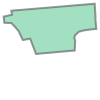

In [59]:
regiao_interesse = shapely.geometry.shape({
    "type" : "Polygon",
    "coordinates": [ [ [ -53.707185, -25.982165 ], [ -53.701279, -25.981671 ], [ -53.701226, -25.982534 ], [ -53.701223, -25.982851 ], [ -53.701178, -25.983263 ], [ -53.701166, -25.983461 ], [ -53.701467, -25.983484 ], [ -53.702046, -25.983563 ], [ -53.702395, -25.983655 ], [ -53.702642, -25.983879 ], [ -53.702728, -25.984049 ], [ -53.702658, -25.984324 ], [ -53.702674, -25.984555 ], [ -53.702695, -25.984989 ], [ -53.705439, -25.985231 ], [ -53.705852, -25.98415 ], [ -53.706373, -25.984243 ], [ -53.706667, -25.983614 ], [ -53.706982, -25.983248 ], [ -53.707187, -25.983043 ], [ -53.707684, -25.983026 ], [ -53.707727, -25.982583 ], [ -53.707144, -25.982453 ], [ -53.707185, -25.982165 ] ] ]
})

regiao_interesse

Para visualizarmos esse polígono sobre um mapa de referência, é possível utilizar as bibliotecas `ipyleaflet` e `ipywidgets`.

In [60]:
# Área de exibição de camadas (mapa) e mapas base (basemaps)
from ipyleaflet import Map, basemaps

# Controles sobre o mapa
from ipyleaflet import FullScreenControl, LayersControl, ScaleControl, SplitMapControl

# Tipos de Camadas
from ipyleaflet import GeoJSON, TileLayer

# Layout
from ipywidgets import Layout

Uma vez importados os tipos de dados dessas bibliotecas, podemos criar um objeto para representar uma camada de apresentação com base no polígono da região de interesse.

In [61]:
camada_regiao_interesse = GeoJSON(
    name="Região de Interesse",
    data=shapely.geometry.mapping(regiao_interesse),
    style={ 'color': 'SteelBlue', 'opacity': 1, 'fillOpacity': 0.1, 'weight': 5 },
    hover_style={ 'color': 'IndianRed', 'opacity': 1, 'fillOpacity': 0.1, 'weight': 5 }
)

In [62]:
mapa = Map(zoom=16, scroll_wheel_zoom=True, layout=Layout(width='80%', height='500px'))

mapa.add(camada_regiao_interesse)

mapa.add(LayersControl(position='topright'))
mapa.add(FullScreenControl())
mapa.add(ScaleControl(position='bottomleft'))

mapa.fit_bounds([[regiao_interesse.bounds[1], regiao_interesse.bounds[0]], [regiao_interesse.bounds[3], regiao_interesse.bounds[2]]])

display(mapa)

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

Agora, vamos recuperar os itens disponíveis na coleção `Sentinel-2/MSI - Level-2A - Cloud Optimized GeoTIFF` (identificador `S2_L2A-1`) para a **região de interesse** no período de **01 de janeiro de 2022** a **08 de dezembro de 2023**. Para isso, será utilizado o método de busca `search` do objeto `catalogo`. Este método irá utilizar o *endpoint* `/search` do serviço STAC do BDC, como mostrado abaixo:

In [63]:
item_search = catalogo.search(
    collections=['S2_L2A-1'],
    datetime='2022-05-01/2022-09-01',
    intersects=shapely.geometry.mapping(regiao_interesse),
    # query={
    #     "eo:cloud_cover": {
    #         "lt": 10.0
    #     }
    # }
)

O número de itens encontrados pode ser verificado através do método `matched()`:

In [64]:
item_search.matched()

48

Podemos atravessar o conjunto de itens retornados com o uso do método `items()`. No exemplo, abaixo, são apresentados os cinco primeiros itens (ou cenas) disponíveis:

In [65]:
import itertools

for item in itertools.islice(item_search.items(), 5):
    print(f"{item.id}")
    print(f"\t{item.properties['datetime']}")
    print(f"\t{item.properties['eo:cloud_cover']}")
    print(f"\t{item.assets['PVI'].href}")

S2B_MSIL2A_20220828T133839_N0400_R124_T22JBS_20220828T173229
	2022-08-28T13:38:39.000000Z
	61.94514000000001
	https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_PVI_20220828T133839_N0400_R124_T22JBS_20220828T173229.png
S2B_MSIL2A_20220828T133839_N0400_R124_T21JZM_20220828T173229
	2022-08-28T13:38:39.000000Z
	60.00740499999999
	https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2B_PVI_20220828T133839_N0400_R124_T21JZM_20220828T173229.png
S2A_MSIL2A_20220823T133851_N0400_R124_T21JZM_20220823T211356
	2022-08-23T13:38:51.000000Z
	0.002989
	https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_PVI_20220823T133851_N0400_R124_T21JZM_20220823T211356.png
S2A_MSIL2A_20220823T133851_N0400_R124_T22JBS_20220823T211356
	2022-08-23T13:38:51.000000Z
	0.0029
	https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2A_PVI_20220823T133851_N0400_R124_T22JBS_20220823T211356.png
S2B_MSIL2A_20220818T133839_N0400_R124_T22JBS_20220818T173231
	2022-08-18T13:38:39.000000Z
	100.0
	ht

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-asset.png?raw=true" align="right" width="300"/>

# Acessando os Assets de um Item
<hr style="border:1px solid #0077b9;">

Vamos trabalhar com os *assets* de um *item*:

In [66]:
item = next(item_search.items())
item

<Item id=S2B_MSIL2A_20220828T133839_N0400_R124_T22JBS_20220828T173229>

In [67]:
for k in item.assets.keys():
    print(k)

AOT
B01
B02
B03
B04
B05
B06
B07
B08
B09
B11
B12
B8A
PVI
SCL
TCI
WVP
MTD_TL


Para iterar em todos os *assets*:

In [68]:
for asset in item.assets.values():
    print(asset)

<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_AOT_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>
<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B01_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>
<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B02_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>
<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B03_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>
<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B04_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>
<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B05_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>
<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B06_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>
<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08

# Usando a Biblioteca RasterIO para Manipular Imagens
<hr style="border:1px solid #0077b9;">

In [69]:
!pip install rasterio

In [70]:
import rasterio

In [71]:
item = next(item_search.items())
item

<Item id=S2B_MSIL2A_20220828T133839_N0400_R124_T22JBS_20220828T173229>

In [72]:
asset_banda4 = item.assets['B04']
asset_banda4

<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B04_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>

In [73]:
with rasterio.open(asset_banda4.href) as banda:
    banda4 = banda.read(1)

In [74]:
banda4

array([[ 1968,  1982,  2019, ...,  1340,  1351,  1352],
       [ 1954,  2004,  2022, ...,  1326,  1353,  1353],
       [ 1954,  1982,  2038, ...,  1308,  1332,  1340],
       ...,
       [12496, 12312, 11976, ..., 11792, 12080, 12312],
       [12672, 12536, 12184, ..., 11256, 11648, 11856],
       [13080, 12888, 12496, ..., 10872, 11176, 11320]], dtype=uint16)

In [75]:
banda4.shape

(10980, 10980)

In [76]:
%matplotlib inline
from matplotlib import pyplot as plt

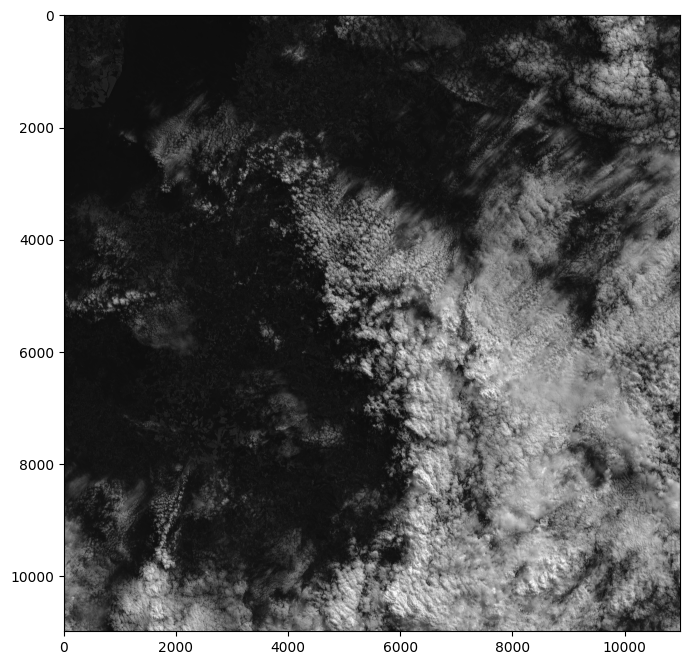

In [77]:
fig, ax1 = plt.subplots(1,1, figsize=(24, 8))
ax1.imshow(banda4, cmap='gray')

In [78]:
from rasterio.windows import Window

In [79]:
window = Window(0, 0, 500, 500)

In [80]:
asset_banda3 = item.assets['B03']
asset_banda3

<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B03_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>

In [81]:
asset_banda2 = item.assets['B02']
asset_banda2

<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/BS/2022/08/S2B_B02_20220828T133839_N0400_R124_T22JBS_20220828T173229.tif>

In [82]:
with rasterio.open(asset_banda4.href) as raster:
    banda4 = raster.read(1, window=window)

In [83]:
with rasterio.open(asset_banda3.href) as raster:
    banda3 = raster.read(1, window=window)

In [84]:
with rasterio.open(asset_banda2.href) as raster:
    banda2 = raster.read(1, window=window)

In [85]:
banda4.shape

(500, 500)

In [86]:
banda3.shape

(500, 500)

In [87]:
banda2.shape

(500, 500)

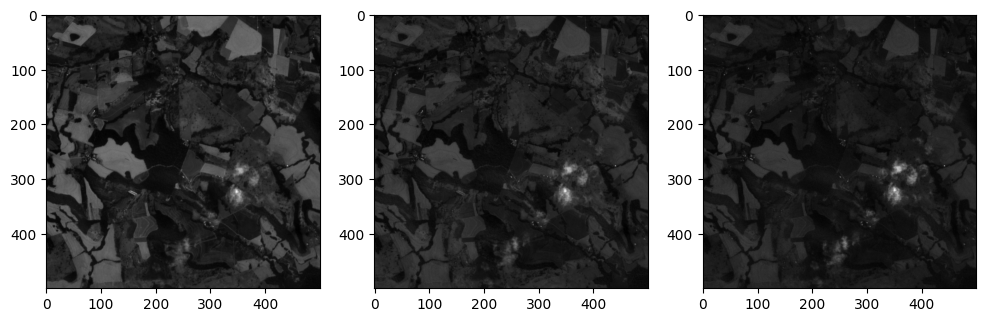

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.imshow(banda4, cmap='gray')
ax2.imshow(banda3, cmap='gray')
ax3.imshow(banda2, cmap='gray')

In [89]:
import numpy

In [90]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

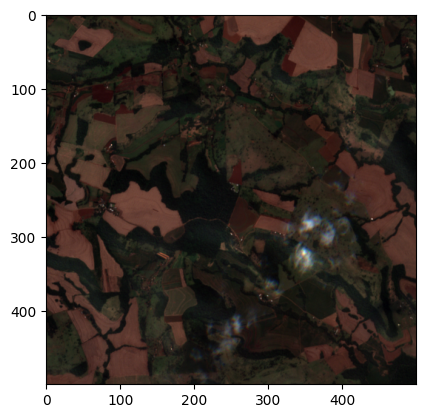

In [91]:
rgb = numpy.dstack((normalize(banda4), normalize(banda3), normalize(banda2)))
plt.imshow(rgb)

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-asset.png?raw=true" align="right" width="300"/>

# Visualização das Imagens com o Serviço TMS
<hr style="border:1px solid #0077b9;">

A coleção `Sentinel-2/MSI - Level-2A - Cloud Optimized GeoTIFF` possui um tipo de *asset* que fornece uma imagem baseada na composição colorida das bandas 4 (*red*), 3 (*green*) e 2 (*blue*) do sensor MSI abordo dos satélites Sentinel 2A e 2B. Vamos verificar os *assets* de um item qualquer retornado na busca:

In [92]:
items = item_search.item_collection()
item = items[2]
assets = item.assets
assets

{'AOT': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_AOT_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif>,
 'B01': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_B01_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif>,
 'B02': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_B02_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif>,
 'B03': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_B03_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif>,
 'B04': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_B04_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif>,
 'B05': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_B05_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif>,
 'B06': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_B06_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif>,
 'B07'

In [93]:
tci_url = assets["TCI"].href

tci_url

'https://data.inpe.br/bdc/data/S2_L2A/v001/21/J/ZM/2022/08/S2A_TCI_20220823T133851_N0400_R124_T21JZM_20220823T211356.tif'

In [94]:
camada_item_1 = TileLayer(
    name=item.id,
    url="https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}" + f"?url={tci_url}"
)

In [95]:
mapa_tms = Map(zoom=16, scroll_wheel_zoom=True, layout=Layout(width='80%', height='500px'))

mapa_tms.add(camada_item_1)
mapa_tms.add(camada_regiao_interesse)

mapa_tms.add(LayersControl(position='topright'))
mapa_tms.add(FullScreenControl())
mapa_tms.add(ScaleControl(position='bottomleft'))

mapa_tms.fit_bounds([[regiao_interesse.bounds[1], regiao_interesse.bounds[0]], [regiao_interesse.bounds[3], regiao_interesse.bounds[2]]])

display(mapa_tms)

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [96]:
camada_item_2 = TileLayer(
    name=items[2].id,
    url="https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}" + f"?url={items[2].assets['TCI'].href}"
)

camada_item_25 = TileLayer(
    name=items[25].id,
    url="https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}" + f"?url={items[25].assets['TCI'].href}"
)


mapa_comp = Map(zoom=18, scroll_wheel_zoom=True, layout=Layout(width='80%', height='500px'))

mapa_comp.add(camada_regiao_interesse)

control = SplitMapControl(left_layer=camada_item_25, right_layer=camada_item_2)

mapa_comp.add(control)


mapa_comp.add(LayersControl(position='topright'))
mapa_comp.add(FullScreenControl())
mapa_comp.add(ScaleControl(position='bottomleft'))

mapa_comp.fit_bounds([[regiao_interesse.bounds[1], regiao_interesse.bounds[0]], [regiao_interesse.bounds[3], regiao_interesse.bounds[2]]])

display(mapa_comp)

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

---



---



# **Atividade proposta para entregar**

# <span style="color:#336699">ACESSO E VISUALIZAÇÃO DE IMAGENS DE SENSORIAMENTO REMOTO: Visualização das Imagens com o Serviço TMS</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 110%;">
    <b>CAP-419 – Introdução à Programação com Dados Geoespaciais (ProgGeo)</b>
    <br/>
    <b>Docentes:</b> Prof. Dr. Gilberto Ribeiro Queiroz e Prof. Dr. Thales Sehn Körting
    <br/><br/>
    <b>Discente:</b> Lourenço José Cavalcante Neto
    <br/>
    <b>E-mail:</b> <a href="mailto:lourenco.cavalcante@ifto.edu.b">lourenco.cavalcante@ifto.edu.br</a>

</div>

<br/>

<div style="text-align: justify;  margin-left: 20%; margin-right: 20%;">
<b>Objetivo: </b> O principal objetivo deste caderno notebook é aplicar técnicas de sensoriamento remoto utilizando o NDVI (Índice de Vegetação por Diferença Normalizada) como ferramenta de análise. Para isso, conforme solicitado pelos professores, foi executado o script base até o final e incluído etapas adicionais: calculo o NDVI de duas imagens fornecidas, obtenho a média dos valores de NDVI de cada uma, visualizo ambas as imagens para comparação e, por fim, percorro todos os pixels de cada imagem para contar quantos apresentam valores acima e abaixo de um limiar definido (por exemplo, 0.5).
</div>

### A seguir, realizo as etapas adicionais solicitadas para complementar a análise, em atenção à atividade proposta:



*   Calcular o NDVI das duas imagens fornecidas;
*   Obter e apresentar a média dos valores de NDVI de cada imagem;
*   Exibir visualmente as duas imagens processadas com NDVI;
*   Percorrer todos os pixels das imagens e contar quantos têm NDVI acima e abaixo de um limiar (exemplo: 0.5).

In [97]:
!pip install rasterio

## a) Cálculo do NDVI das duas imagens fornecidas

In [98]:
# Aqui eu recupera novamente os itens da busca (usado nas células anteriores)
items = item_search.item_collection()

# Seleciono duas imagens para análise, passando a posição das mesmas na lista "items" pelo argumento
item1 = items[2]
item2 = items[3]

# Aqui eu defino uma janela de recorte menor para processar mais rápido
from rasterio.windows import Window
janela = Window(0, 0, 500, 500)

# Abrir as bandas NIR (B08) e RED (B07) da imagem 1
with rasterio.open(item1.assets['B08'].href) as nir:
    nir1 = nir.read(1, window=janela)

with rasterio.open(item1.assets['B07'].href) as red:
    red1 = red.read(1, window=janela)

# Abrir as bandas NIR (B08) e RED (B07) da imagem 2
with rasterio.open(item2.assets['B08'].href) as nir:
    nir2 = nir.read(1, window=janela)

with rasterio.open(item2.assets['B07'].href) as red:
    red2 = red.read(1, window=janela)

# Calcula o NDVI das duas imagens

import numpy as np

#Embora não faça parte da equação original, eu adicionei no denominador 0.000000001, para evitar que ocorram divisões por zero
ndvi1 = (nir1.astype(float) - red1.astype(float)) / (nir1 + red1  + 0.000000001)
ndvi2 = (nir2.astype(float) - red2.astype(float)) / (nir2 + red2  + 0.000000001)


## b) Obter e apresentar a média dos valores de NDVI de cada imagem

In [99]:
# Mostra as médias dos valores de NDVI
media1 = np.mean(ndvi1)
media2 = np.mean(ndvi2)

print("Média NDVI da imagem 1:", round(media1, 4))
print("Média NDVI da imagem 2:", round(media2, 4))

Média NDVI da imagem 1: 0.0298
Média NDVI da imagem 2: 0.016


## c) Exibir visualmente as duas imagens processadas com NDVI

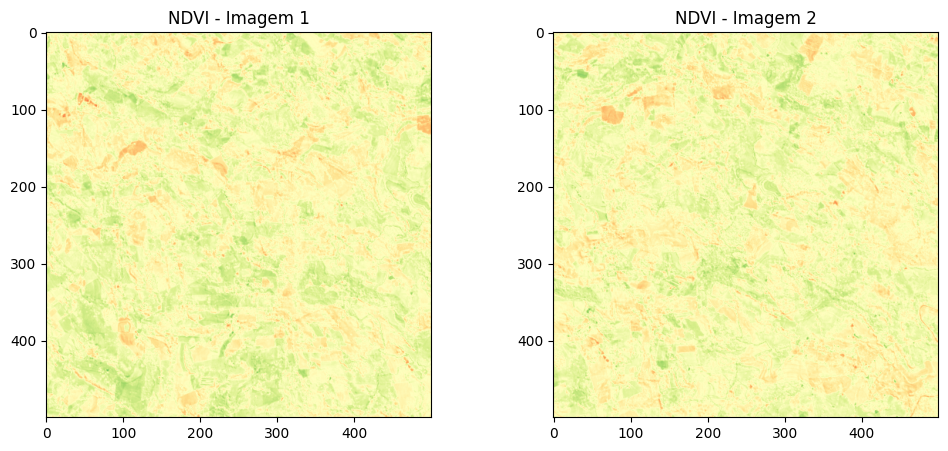

In [100]:
# Exibe os NDVIs em forma de imagem (cores de vegetação)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ndvi1, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('NDVI - Imagem 1')

plt.subplot(1, 2, 2)
plt.imshow(ndvi2, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('NDVI - Imagem 2')

plt.show()

## d) Percorrer todos os pixels das imagens e contar quantos têm NDVI acima e abaixo de um limiar (no caso em em questão, foi usado 0.5)

In [101]:
# Contagem de pixels com NDVI acima e abaixo de 0.5
limiar = 0.5

acima1 = (ndvi1 > limiar).sum()
abaixo1 = (ndvi1 <= limiar).sum()

acima2 = (ndvi2 > limiar).sum()
abaixo2 = (ndvi2 <= limiar).sum()

print("Imagem 1 - NDVI > 0.5:", acima1, "| NDVI <= 0.5:", abaixo1)
print("Imagem 2 - NDVI > 0.5:", acima2, "| NDVI <= 0.5:", abaixo2)

Imagem 1 - NDVI > 0.5: 4 | NDVI <= 0.5: 249996
Imagem 2 - NDVI > 0.5: 6 | NDVI <= 0.5: 249994


Solução alternativa para o item d) usando a estrutura de repetição "for":

In [102]:
# Aqui eu defini os contadores
acima1 = 0
abaixo1 = 0

acima2 = 0
abaixo2 = 0

limiar = 0.5

# Laço para a primeira imagem (ndvi1)
for i in range(ndvi1.shape[0]):
    for j in range(ndvi1.shape[1]):
        if ndvi1[i, j] > limiar:
            acima1 += 1
        else:
            abaixo1 += 1

# Laço para a segunda imagem (ndvi2)
for i in range(ndvi2.shape[0]):
    for j in range(ndvi2.shape[1]):
        if ndvi2[i, j] > limiar:
            acima2 += 1
        else:
            abaixo2 += 1

print("Imagem 1 - NDVI > 0.5:", acima1, "| NDVI <= 0.5:", abaixo1)
print("Imagem 2 - NDVI > 0.5:", acima2, "| NDVI <= 0.5:", abaixo2)


Imagem 1 - NDVI > 0.5: 4 | NDVI <= 0.5: 249996
Imagem 2 - NDVI > 0.5: 6 | NDVI <= 0.5: 249994
